<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Week 9 Review - Solutions

 _**Author:** Noelle B. (DSI-DEN)_

---
We will review the learning objectives of each lesson this week and answer questions related to them.

---
## 8.07 Word Vectors

### Describe vector

**Q1.** What is a word vector?

> **Answer:**  
A word vector is a way to represent a word using a vector in space. Vectors capture the magnitude and direction, which allows similar words to have similar magnitudes or directions.

### Use Word2Vec & Describe why word vectors are superior to other word embeddings

**Q2.** Describe why word embeddings are sometimes superior to other word vectors.

> **Answer:** 
Word embeddings can capture the similarities between words using words that are often used together to understand the similarities between them. This allows more meaning to be discovered in the text vs. treating each word as independent.

---
## 9.01 Intro to Time Series

### Understand how to turn the date into the index

**Q3.** Import the bus dataset. Turn the date into the index (make sure the date is a datetime object).

In [1]:
import pandas as pd

bus = pd.read_csv('data/bus.csv')
bus.head()

,date,bus_ridership
0,1973-01-01,648
1,1973-02-01,646
2,1973-03-02,639
3,1973-04-02,654
4,1973-05-02,630


In [2]:
# Answer:
# convert date into datetime objects
bus['date'] = pd.to_datetime(bus['date'])
# change index of dataframe to the date
bus = bus.set_index('date')
bus.head()

,bus_ridership
date,
1973-01-01,648
1973-02-01,646
1973-03-02,639
1973-04-02,654
1973-05-02,630


### Understand and implement the following pandas methods:
    - `.rolling()`
    - `.diff()`
    - `.pct_change()`
    - `.shift()`

**Q4.** What does the `.rolling()` pandas method do?

> **Answer:**  
Allows for rolling statistics (ie. "I want the average of the past 7 days' ridership")
- **`window`** : the "length" or the period of the window
- **`min_periods=None`** : Min number of observations in a window
- **`win_type=None`** : Type of window

**Q5.** What does the `.diff()` pandas method do?

> **Answer:**  
The literal subtraction between day x and the period specified
- **`periods`** : With what time before you subtract from
    - `periods = 1` : Subtracting from previous day
    - `periods = 7` : Subtracting from exactly 7 days ago

**Q6.** What does the `.pct_change()` pandas method do?

> **Answer:**  
Percent change for the period specified

**Q7.** What does the `.shift()` pandas method do?

> **Answer:**    
Just shifts the days down by specified period

---
## 9.02 Linear Time Series Modeling

### Define forecasting.

**Q8.** Describe forecasting and some of its challenges.

> **Answer:**  
Predicting a future estimate for a target variable  
Some challenges:
    - As we forecast farther out, accuracy starkly decreases
    - Changes will be compounded in future forecasts
    - Is the data available, and how much?

### Define and identify trend and seasonality in time series data.

**Q9.** Define `Trend`.

> **Answer:**  
patterns over time, long-term changes; most trends are linear or quadratic

**Q10.** Define `Seasonality`.

> **Answer:**  
fluctuations over a "fixed and known" interval

### Define and calculate autocorrelation manually.

**Q11.** Manually calculate the autocorrelation with 1, 2, and 3 lags for the bus data.

In [14]:
# imports
import pandas as pd
import numpy as np

bus = pd.read_csv('data/bus.csv')

# reset bus dataframe
bus = bus[['bus_ridership']]

# Specify frequency for data
bus.index = pd.date_range('1/1/1973', # start date is January 1, 1973
                               periods=len(bus.index), # we want one period per entry
                               freq='M') # frequency in months

In [15]:
# Answer:
# Generate shifts
bus['bus_lag_1'] = bus['bus_ridership'].shift(1)
bus['bus_lag_2'] = bus['bus_ridership'].shift(2)
bus['bus_lag_3'] = bus['bus_ridership'].shift(3)

# Calculate the correlations among these columns.
bus.corr()

,bus_ridership,bus_lag_1,bus_lag_2,bus_lag_3
bus_ridership,1.000000,0.977840,0.957902,0.948207
bus_lag_1,0.977840,1.000000,0.977990,0.958343
bus_lag_2,0.957902,0.977990,1.000000,0.977862
bus_lag_3,0.948207,0.958343,0.977862,1.000000


### Generate and interpret an autocorrelation plot.

**Q12.** Generate and interpret an autocorrelation plot for the bus data.

In [12]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

bus = pd.read_csv('data/bus.csv')

# reset bus dataframe
bus = bus[['bus_ridership']]

# Specify frequency for data
bus.index = pd.date_range('1/1/1973', # start date is January 1, 1973
                               periods=len(bus.index), # we want one period per entry
                               freq='M') # frequency in months

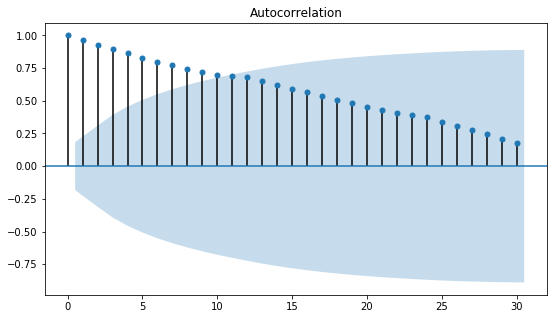

In [13]:
# Answer:
fig, ax = plt.subplots(figsize = (9, 5))
plot_acf(bus['bus_ridership'], lags = 30, ax = ax)
plt.show();

> **Answer:**  
Interpretation: Since the autocorrelation plot has large and positive values for small lags (e.g. lags 1, 2, 3), this is evidence that a trend exists.

###  Generate and interpret a partial autocorrelation plot.

**Q13.** Generate and interpret a partial autocorrelation plot for the bus data.

In [16]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline

bus = pd.read_csv('data/bus.csv')

# reset bus dataframe
bus = bus[['bus_ridership']]

# Specify frequency for data
bus.index = pd.date_range('1/1/1973', # start date is January 1, 1973
                               periods=len(bus.index), # we want one period per entry
                               freq='M') # frequency in months

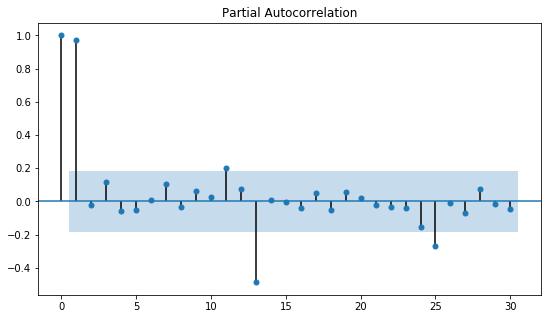

In [18]:
# Answer:
fig, ax = plt.subplots(figsize = (9, 5))
plot_pacf(bus['bus_ridership'], lags = 30, ax = ax)
plt.show();

> **Answer:**  
Interpretation: Since the partial autocorrelation plot has significant values for seasonal lags around 13 and 25, this is evidence that annual seasonality exists.

### Properly fit, generate predictions from, and evaluate a linear time series model.

**Q14.** Properly fit, generate predictions from, and evaluate a linear time series model on the bus dataset.

In [19]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# modeling imports
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
# evaluation imports
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller

bus = pd.read_csv('data/bus.csv')

# reset bus dataframe
bus = bus[['bus_ridership']]

# Specify frequency for data
bus.index = pd.date_range('1/1/1973', # start date is January 1, 1973
                               periods=len(bus.index), # we want one period per entry
                               freq='M') # frequency in months

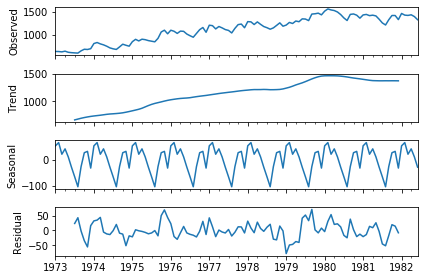

In [20]:
# Answer:
# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(bus['bus_ridership'])

# Plot the decomposed time series.
decomp.plot();

In [21]:
# make bus_ridership into float values
# (p,q), p is the AR part
bus['bus_ridership'] = bus['bus_ridership'].astype(float)

# fit an AR model with a lag of 1
ar1 = ARMA(endog = bus['bus_ridership'],
           order = (1, 0))

model = ar1.fit()

# generate predicted values
preds = model.predict()
r2_score(bus['bus_ridership'], preds)

0.9364337680336152

In [22]:
# fit a MA model with a window of 1
# (p,q), q is the MA part
ma1 = ARMA(endog = bus['bus_ridership'],
           order = (0, 1))

model = ma1.fit()
preds = model.predict()
r2_score(bus['bus_ridership'], preds)

0.6553313319861592

...or...

In [23]:
# Create a column called `lag_1` that lags Passengers by one month.
bus['lag_1'] = bus['bus_ridership'].shift(2)

# Create a column called `lag_2` that lags Passengers by two months.
bus['lag_2'] = bus['bus_ridership'].shift(2)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(bus.drop(columns='bus_ridership'),
                                                    bus['bus_ridership'],
                                                    test_size = 0.2,
                                                    shuffle = False) #not random for timeseries data

In [25]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

lm = sm.OLS(y_train, X_train)
lm_results = lm.fit()
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:          bus_ridership   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1000.
Date:                Mon, 11 May 2020   Prob (F-statistic):           1.73e-49
Time:                        10:16:24   Log-Likelihood:                -507.52
No. Observations:                  89   AIC:                             1019.
Df Residuals:                      87   BIC:                             1024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.2155     32.427      2.073      0.0

In [26]:
r2_score(y_test, lm_results.predict(X_test))

-0.922667767943427

---
## 9.03 ARIMA Models

### Describe the purpose of the autoregressive and moving average components.

**Q15.** What is the purpose of the autoregressive and moving average components?

> **Answer:**  
- Autoregressive (AR): Explains long-term trends
- Moving average (MA): Takes previous error terms as inputs to explain sudden shocks in our data 

### Define hyperparameters p, d, and q.

**Q16.** What do the hyperparameters `p`, `d`, and `q` do in the ARIMA model?

> **Answer:**  
Autoregressive (AR - p) models:
- Better for long-term trends
- Number of previous observations to consider when predicting (lags)

> Moving average (MA - q) models:  
- Better for short-term fluctuations
- Number of errors we regress on  

> Integrated (d)  
- How many differences we need to achieve stationarity

### Describe AIC & Find the right value of p and q using AIC.

**Q17.** What is AIC and what is it used for?

> **Answer:**  
The Akaike information criterion that estimates the quality of the model - how well the model performs on real life data since we lose realistic outcomes using often unpredictable time series data.

**Q18.** Define stationarity.

>**Answer:**   
Data that is detrended, mean is constant, line of best fit is horizontal

### Find the right value of d using the augmented Dickey-Fuller test.

**Q19.** Conduct and interpret an augmented Dickey-Fuller test for stationarity on the bus data.

In [32]:
# imports
import pandas as pd
from statsmodels.tsa.stattools import adfuller

bus = pd.read_csv('data/bus.csv')

# reset bus dataframe
bus = bus[['bus_ridership']]

# Specify frequency for data
bus.index = pd.date_range('1/1/1973', # start date is January 1, 1973
                               periods=len(bus.index), # we want one period per entry
                               freq='M') # frequency in months

In [33]:
# Answer:
# Original code written by Joseph Nelson
def interpret_dftest(series):
    return pd.Series(adfuller(series)[0:2], index=['Test Statistic','p-value'])

In [34]:
# Not stationary
interpret_dftest(bus['bus_ridership'])

Test Statistic   -1.536597
p-value           0.515336
dtype: float64

In [35]:
# First difference
interpret_dftest(bus['bus_ridership'].diff().dropna())

Test Statistic   -1.938696
p-value           0.314082
dtype: float64

In [36]:
# Second difference
interpret_dftest(bus['bus_ridership'].diff().diff().dropna())

Test Statistic   -1.247869e+01
p-value           3.126378e-23
dtype: float64

### Complete a manual GridSearch.

**Q20.** Create a manual GridSearch using the bus data to find the values of p and q (between 0-4) that give the best AIC.

In [5]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA

bus = pd.read_csv('data/bus.csv')

# reset bus dataframe
bus = bus[['bus_ridership']]

# Specify frequency for data
bus.index = pd.date_range('1/1/1973', # start date is January 1, 1973
                               periods=len(bus.index), # we want one period per entry
                               freq='M') # frequency in months

# Create first_diff_temp and second_diff_temp
# columns in df.
bus['first_diff_temp'] = bus['bus_ridership'].diff(1)
bus['second_diff_temp'] = bus['bus_ridership'].diff(1).diff(1)

# test train split using second differenced data
y_train, y_test = train_test_split(bus['second_diff_temp'],
                                   test_size = 0.15,
                                   shuffle = False) # Shuffle = False is IMPORTANT!

In [7]:
# Answer:
# Code from global lesson 9.03
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting to fit ARIMA({p},1,{q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
                          order = (p,1,q)) # values of p, d, q
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0,1,0)
The AIC for ARIMA(0,1,0) is: 1182.9025396339928
Attempting to fit ARIMA(0,1,1)
The AIC for ARIMA(0,1,1) is: 1091.9543845728997
Attempting to fit ARIMA(0,1,2)
Attempting to fit ARIMA(0,1,3)
Attempting to fit ARIMA(0,1,4)
Attempting to fit ARIMA(1,1,0)
The AIC for ARIMA(1,1,0) is: 1147.9447951834088
Attempting to fit ARIMA(1,1,1)
Attempting to fit ARIMA(1,1,2)
Attempting to fit ARIMA(1,1,3)
Attempting to fit ARIMA(1,1,4)
Attempting to fit ARIMA(2,1,0)
The AIC for ARIMA(2,1,0) is: 1107.4682174577285
Attempting to fit ARIMA(2,1,1)
The AIC for ARIMA(2,1,1) is: 1053.9642054197925
Attempting to fit ARIMA(2,1,2)
Attempting to fit ARIMA(2,1,3)
Attempting to fit ARIMA(2,1,4)
Attempting to fit ARIMA(3,1,0)
The AIC for ARIMA(3,1,0) is: 1093.2118050476145
Attempting to fit ARIMA(3,1,1)
The AIC for ARIMA(3,1,1) is: 1051.1288016100555
Attempting to fit ARIMA(3,1,2)
Attempting to fit ARIMA(3,1,3)
Attempting to fit ARIMA(3,1,4)
Attempting to fit ARIMA(4,1,0)
The AIC for A

### Fit an ARIMA model.

**Q21.** Use the bus dataset to fit an ARIMA model.

In [12]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA

bus = pd.read_csv('data/bus.csv')

# reset bus dataframe
bus = bus[['bus_ridership']]

# Specify frequency for data
bus.index = pd.date_range('1/1/1973', # start date is January 1, 1973
                               periods=len(bus.index), # we want one period per entry
                               freq='M') # frequency in months

# test train split using second differenced data
y_train, y_test = train_test_split(bus['bus_ridership'],
                                   test_size = 0.15,
                                   shuffle = False) # Shuffle = False is IMPORTANT!

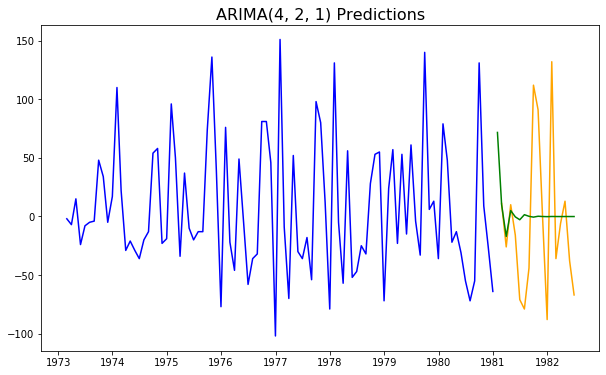

In [13]:
# Answer:
# Code from global lesson 9.03
import matplotlib.pyplot as plt
%matplotlib inline

# Instantiate best model.
model = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
              order = (4,2,1))

# Fit ARIMA model.
arima = model.fit()

# Generate predictions based on test set.
preds = model.predict(params = arima.params,
                      start = y_test.index[0],
                      end = y_test.index[-1])

# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(y_train.index, pd.DataFrame(y_train).diff(), color = 'blue')

# Plot testing data.
plt.plot(y_test.index, pd.DataFrame(y_test).diff(), color = 'orange')

# Plot predicted test values.
plt.plot(y_test.index, preds, color = 'green')

plt.title(label = 'ARIMA(4, 2, 1) Predictions', fontsize=16)
plt.show();

---
## 9.04 Advanced Time Series Models

### Describe univariate and multivariate time series.

**Q22.** Describe `univariate` and `multivariate` time series.

>**Answer:**  
- **Univariate** time series: One variable
- **Multivariate** time series: Many variables to consider (that might be related)

### Identify the advantages of working with multivariate time series.

**Q23.** Identify the advantages of working with multivariate time series.

>**Answer:**  
More realistic, more accurate prediction

### Define VAR models.

**Q24.** Define `VAR` models.

>**Answer:** 
VAR models are vector autoregressive models (from global lesson 9.04)
- Rather than regressing one time series $Y_t$ on lagged versions of itself and on lagged versions of independent variables $X$, we will take all of our variables $Y_{1,t}, Y_{2,t}, Y_{3,t}, \ldots$ and regress them on one another simultaneously.
- This allows us to forecast forward many variables simultaneously.

### Understand and test for the assumptions of VAR models.

**Q25.** What are the assumptions of VAR models and how can you test for them?

>**Answer:**  
VAR models **require** stationarity. You can test for this using the Dickey-Fuller test.

### Fit, generate predictions from, and evaluate VAR models.

**Q26.** When would you use a VAR model?

> **Answer:**  
When we need to deal with forecasting multiple variable into the future

---
## 9.05 Benford's Law

### Understand what Benford's law is

**Q27.** Describe Benford's law.

> **Answer:**  
Benfords law describes the pattern that numbers with a smaller first digit are more frequent. It is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digit is likely to be small.

### Use Benford's law to find anomalies within a dataset.

**Q28.** How can Benford's law help you find anomalies within a dataset?

> **Answer:**  
(From global lesson 9.05) Forensic accountants typically use Benford's law to screen for irregularities in financial reports. Financial datasets tend to follow Benford's law unless human intervention is involved, which can sometimes lead to fraud.

---
## 9.06 Flask

### Explain what flask is and what a route is.

**Q29.** What is flask?

> **Answer:**  
Flask is a library for building web services like websites and APIs in Python. More formally, it is a lightweight web framework for Python.

**Q30.** What is a route?

> **Answer:**  
When users make requests to a specific URL, we can break that down into the base URL and the route. The base URL is the standard/base website, the route is the sub-page. Ex. https://www.reddit.com[base]/r/BirdsArentReal.json[route]

### Spin up a simple web API using the flask framework & create app routes to perform a variety of tasks, including serving data to or collecting input from our users.

**Q31.** Write code that would display the text "Welcome to my Flask app!" on the home page.

> **Answer:**  

```Python
app = Flask('myApp')

@app.route('/')
def home():
    return 'Welcome to my Flask app!'
```